# Pre-processingWDOE Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/Washington/Regulatory/Regulatory_WDOE" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/Washington/Regulatory/Regulatory_WDOE


## Regulatory Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/WRIA.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Water_Resource_Inventory_Areas_(WRIA).zip', compression=dict(method='zip', archive_name='Water_Resource_Inventory_Areas_(WRIA).csv'), index=False)

# Realign Geometry Projection
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

print(len(dfin1))
dfin1.head()

62


,OBJECTID,WRIA_NR,WRIA_NM,WRIA_ID,WRIA_AREA_,GlobalID,created_us,created_da,last_edite,last_edi_1,SHAPE_Leng,SHAPE_Area,geometry,WaDEUUID
0,1,62,Pend Oreille,1,789790.04298,{2E9243DC-FFB5-4F1F-ADC6-E1DBC845A9AE},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,983139.52888,34404968924.90178,"POLYGON ((-117.42955 49.00047, -117.42920 49.0...",re0
1,2,61,Upper Lake Roosevelt,2,368826.08779,{F365ABB0-65A3-4611-BF97-1BA0C269E808},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,743741.84071,16066805223.36566,"POLYGON ((-118.06255 49.00021, -118.06184 49.0...",re1
2,3,1,Nooksack,3,1036786.45950,{02195EB7-FEF4-457A-93E9-BA3964124A93},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,1478104.96421,45163907493.73452,"POLYGON ((-121.36438 48.87707, -121.36428 48.8...",re2
3,4,60,Kettle,4,656426.12599,{C5196E1E-6FFE-40B5-BDB5-DE76FBA667FD},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,966414.46891,28595381917.68454,"POLYGON ((-119.15756 49.00008, -119.14248 49.0...",re3
4,5,49,Okanogan,5,1342476.88228,{EA14957C-8D24-4048-B2DF-171659828838},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,1443751.40210,58480792695.25362,"POLYGON ((-119.15756 49.00008, -119.15767 48.9...",re4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/2/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "WDOEre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["WRIA_NM"]
df['in_ReportingUnitNativeID'] = "wa" + dfin1["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Water Resource Inventory Areas"
df['in_ReportingUnitUpdateDate'] = dfin1["last_edi_1"]
df['in_StateCV'] = "WA"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Washington Department of Ecology"
df['in_RegulatoryDescription'] = "Our innovative partnerships sustain healthy land, air, and water in harmony with a strong economy."
df['in_RegulatoryName'] = dfin1["WRIA_NM"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] =""
df['in_StatutoryEffectiveDate'] = "1/1/1971"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Water Resource Inventory Area"
df['in_WaterSourceTypeCV'] = "Surface Water"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

62


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,8/2/2023,2023,WDOEre_O1,4326,Pend Oreille,wa1,,Water Resource Inventory Areas,2023-08-01,WA,,Washington Department of Ecology,Our innovative partnerships sustain healthy la...,Pend Oreille,1,Active,,,1/1/1971,,Water Resource Inventory Area,Surface Water
1,re1,8/2/2023,2023,WDOEre_O1,4326,Upper Lake Roosevelt,wa2,,Water Resource Inventory Areas,2023-08-01,WA,,Washington Department of Ecology,Our innovative partnerships sustain healthy la...,Upper Lake Roosevelt,2,Active,,,1/1/1971,,Water Resource Inventory Area,Surface Water
2,re2,8/2/2023,2023,WDOEre_O1,4326,Nooksack,wa3,,Water Resource Inventory Areas,2023-08-01,WA,,Washington Department of Ecology,Our innovative partnerships sustain healthy la...,Nooksack,3,Active,,,1/1/1971,,Water Resource Inventory Area,Surface Water
3,re3,8/2/2023,2023,WDOEre_O1,4326,Kettle,wa4,,Water Resource Inventory Areas,2023-08-01,WA,,Washington Department of Ecology,Our innovative partnerships sustain healthy la...,Kettle,4,Active,,,1/1/1971,,Water Resource Inventory Area,Surface Water
4,re4,8/2/2023,2023,WDOEre_O1,4326,Okanogan,wa5,,Water Resource Inventory Areas,2023-08-01,WA,,Washington Department of Ecology,Our innovative partnerships sustain healthy la...,Okanogan,5,Active,,,1/1/1971,,Water Resource Inventory Area,Surface Water


## Regulatory Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

62


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Pend Oreille', 'Upper Lake Roosevelt', 'Nooksack', 'Kettle',
       'Okanogan', 'Upper Skagit', 'Methow', 'San Juan', 'Colville',
       'Sanpoil', 'Lower Skagit - Samish', 'Middle Lake Roosevelt',
       'Lyre - Hoko', 'Chelan', 'Soleduc', 'Stillaguamish', 'Island',
       'Nespelem', 'Quilcene - Snow', 'Elwha - Dungeness', 'Foster',
       'Little Spokane', 'Middle Spokane', 'Wenatchee', 'Entiat',
       'Lower Spokane', 'Lower Lake Roosevelt', 'Grand Coulee', 'Kitsap',
       'Upper Crab-Wilson', 'Skokomish - Dosewallips', 'Moses Coulee',
       'Queets - Quinault', 'Hangman', 'Palouse', 'Upper Yakima',
       'Lower Chehalis', 'Kennedy - Goldsborough', 'Lower Crab',
       'Alkali - Squilchuck', 'Chambers - Clover', 'Deschutes', 'Naches',
       'Nisqually', 'Upper Chehalis', 'Willapa', 'Esquatzel Coulee',
       'Middle Snake', 'Cowlitz', 'Lower Snake', 'Lower Yakima',
       'Grays - Elochoman', 'Walla Walla', 'Klickitat', 'Lewis',
       'Rock - Glade', 'Wind - White Sal

In [9]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Our innovative partnerships sustain healthy land, air, and water in harmony with a strong economy.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Pend Oreille', 'Upper Lake Roosevelt', 'Nooksack', 'Kettle',
       'Okanogan', 'Upper Skagit', 'Methow', 'San Juan', 'Colville',
       'Sanpoil', 'Lower Skagit - Samish', 'Middle Lake Roosevelt',
       'Lyre - Hoko', 'Chelan', 'Soleduc', 'Stillaguamish', 'Island',
       'Nespelem', 'Quilcene - Snow', 'Elwha - Dungeness', 'Foster',
       'Little Spokane', 'Middle Spokane', 'Wenatchee', 'Entiat',
       'Lower Spokane', 'Lower Lake Roosevelt', 'Grand Coulee', 'Kitsap',
       'Upper Crab-Wilson', 'Skokomish - Dosewallips', 'Moses Coulee',
       'Queets - Quinault', 'Hangman', 'Palouse', 'Upper Yakima',
       'Lower Chehalis', 'Kennedy - Goldsborough', 'Lower Crab',
       'Alkali - Squilchuck', 'Chambers - Clover', 'Deschutes', 'Naches',
       'Nisqually', 'Upper Chehalis', 'Willapa', 'Esquatzel Coulee',
       'Middle Snake', 'Cowlitz', 'Lower Snake', 'Lower Yakima',
       'Grays - Elochoman', 'Walla Walla', 'Klickitat', 'Lewis',
       'Rock - Glade', 'Wind - White Sal

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1971-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [12]:
# Input File
shapeInputFile = "RawInputData/shapefiles/WRIA.zip"
gdfin1 = gpd.read_file(shapeInputFile)

# Realign Geometry Projection
gdfin1['geometry'] = gdfin1['geometry'].to_crs(epsg=4326)

print(len(gdfin1))
gdfin1.head()

62


,OBJECTID,WRIA_NR,WRIA_NM,WRIA_ID,WRIA_AREA_,GlobalID,created_us,created_da,last_edite,last_edi_1,SHAPE_Leng,SHAPE_Area,geometry
0,1,62,Pend Oreille,1,789790.04298,{2E9243DC-FFB5-4F1F-ADC6-E1DBC845A9AE},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,983139.52888,34404968924.90178,"POLYGON ((-117.42955 49.00047, -117.42920 49.0..."
1,2,61,Upper Lake Roosevelt,2,368826.08779,{F365ABB0-65A3-4611-BF97-1BA0C269E808},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,743741.84071,16066805223.36566,"POLYGON ((-118.06255 49.00021, -118.06184 49.0..."
2,3,1,Nooksack,3,1036786.45950,{02195EB7-FEF4-457A-93E9-BA3964124A93},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,1478104.96421,45163907493.73452,"POLYGON ((-121.36438 48.87707, -121.36428 48.8..."
3,4,60,Kettle,4,656426.12599,{C5196E1E-6FFE-40B5-BDB5-DE76FBA667FD},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,966414.46891,28595381917.68454,"POLYGON ((-119.15756 49.00008, -119.14248 49.0..."
4,5,49,Okanogan,5,1342476.88228,{EA14957C-8D24-4048-B2DF-171659828838},WAECY_Geoservices,2023-08-01,WAECY_Geoservices,2023-08-01,1443751.40210,58480792695.25362,"POLYGON ((-119.15756 49.00008, -119.15767 48.9..."


<AxesSubplot: >

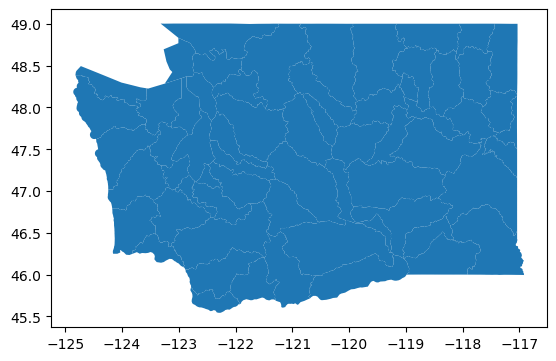

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "wa" + gdfin1["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

62


,in_ReportingUnitNativeID,geometry
0,wa1,"POLYGON ((-117.42955 49.00047, -117.42920 49.0..."
1,wa2,"POLYGON ((-118.06255 49.00021, -118.06184 49.0..."
2,wa3,"POLYGON ((-121.36438 48.87707, -121.36428 48.8..."
3,wa4,"POLYGON ((-119.15756 49.00008, -119.14248 49.0..."
4,wa5,"POLYGON ((-119.15756 49.00008, -119.15767 48.9..."


#### Regulatory Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [16]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

62


,in_ReportingUnitNativeID,geometry
0,wa1,"POLYGON ((-117.42955 49.00047, -117.42920 49.0..."
1,wa2,"POLYGON ((-118.06255 49.00021, -118.06184 49.0..."
2,wa3,"POLYGON ((-121.36438 48.87707, -121.36428 48.8..."
3,wa4,"POLYGON ((-119.15756 49.00008, -119.14248 49.0..."
4,wa5,"POLYGON ((-119.15756 49.00008, -119.15767 48.9..."


## Export Data

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID               int64
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [19]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_wdoeMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.